In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints', 'Diabetes.csv', 'Untitled.ipynb']

## Importing the data

In [2]:
data = pd.read_csv('Diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()
print("\n\nNull columns: \n",data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null columns: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age         

In [40]:
data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.columns = data.columns.str.lower()
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Vizualization


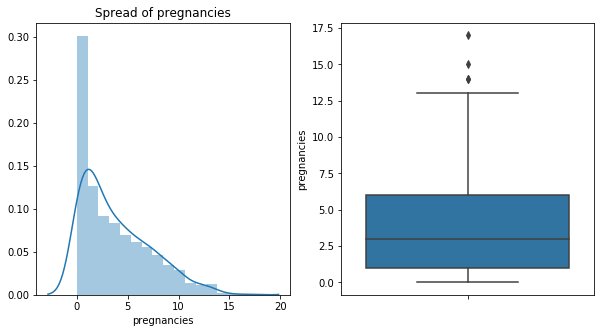

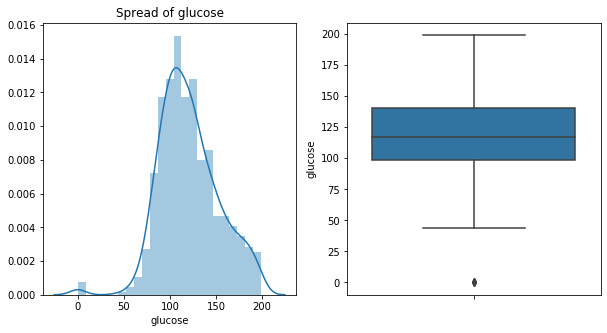

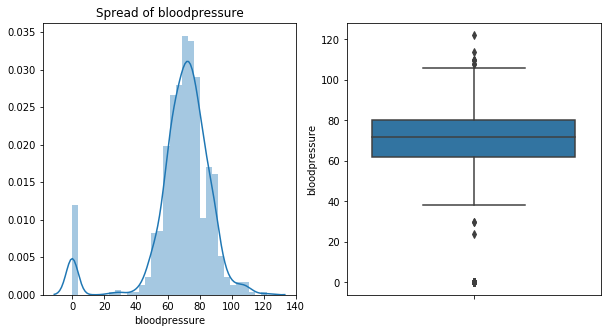

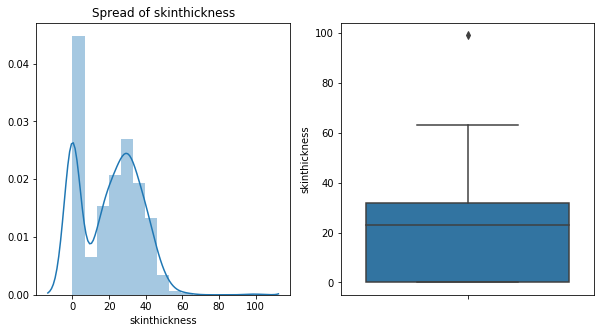

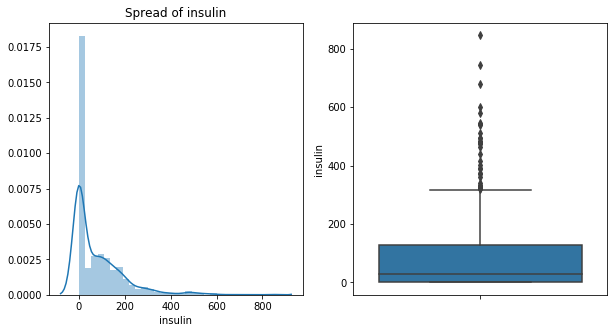

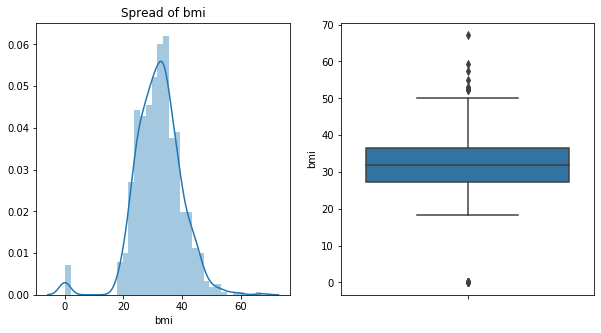

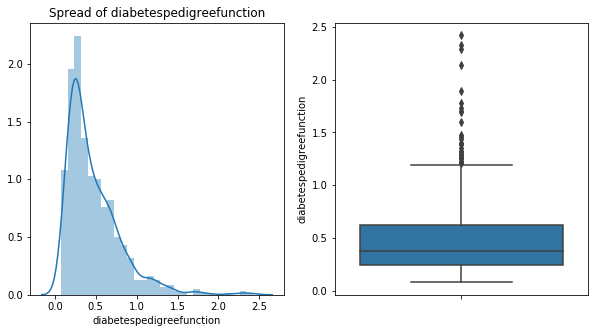

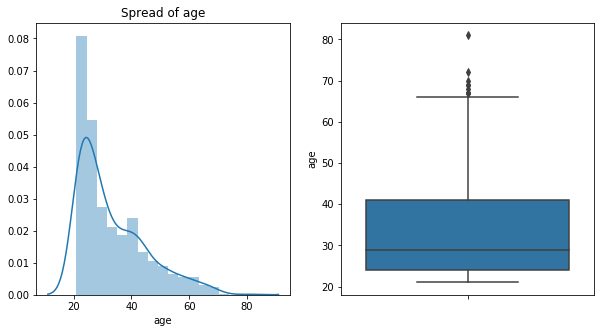

In [8]:
def distplot(df,x):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[x])
    plt.title('Spread of '+x)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[x])
    plt.show()

    
for column in data.columns:
    if column=='outcome':
        break
    else:
        distplot(data,column)

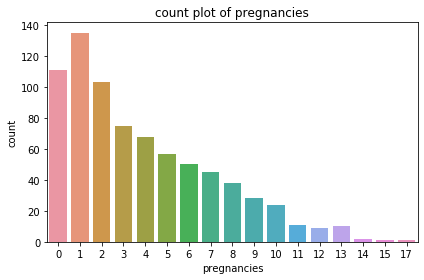

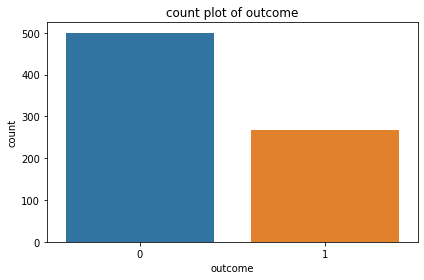

In [9]:
def countplot(df,x):
    
    sns.countplot(df[x])
    plt.title('count plot of '+x)
    plt.tight_layout()
    plt.show()
countplot(data,'pregnancies')
countplot(data,'outcome')

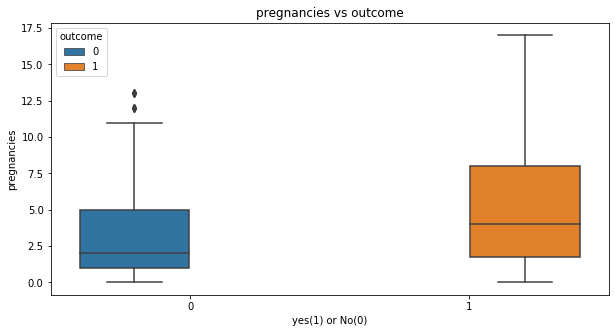

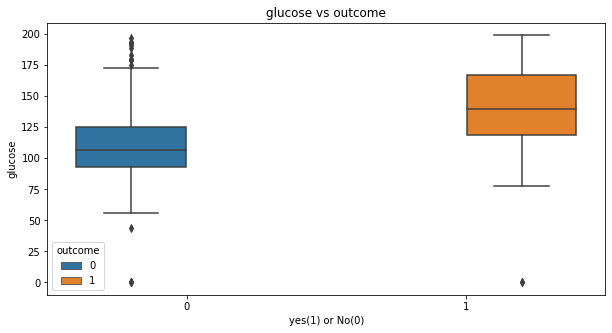

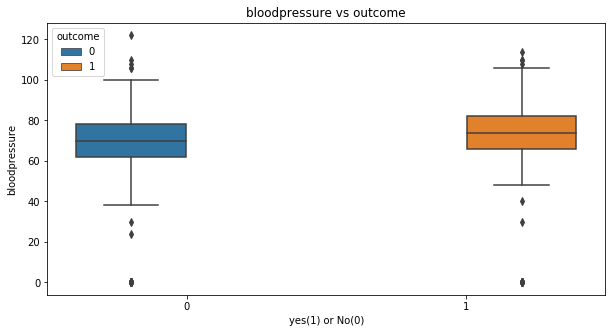

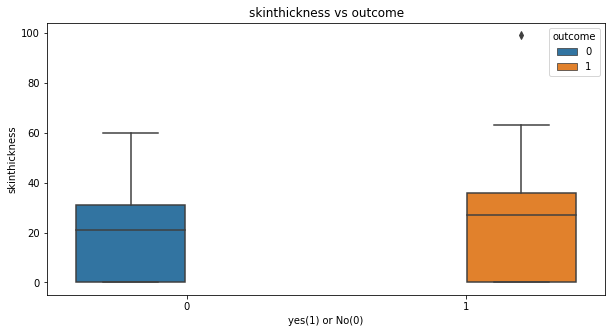

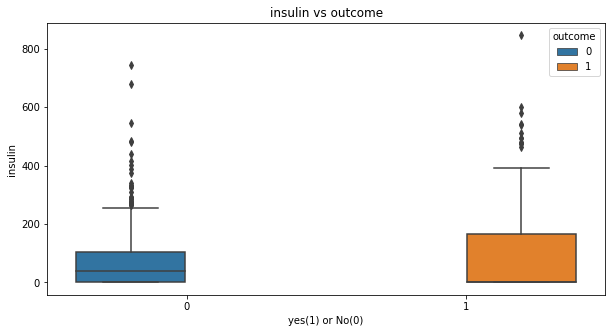

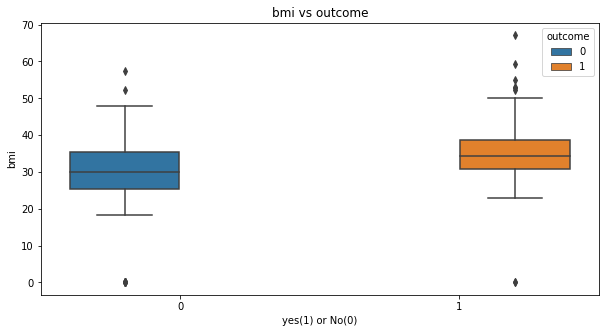

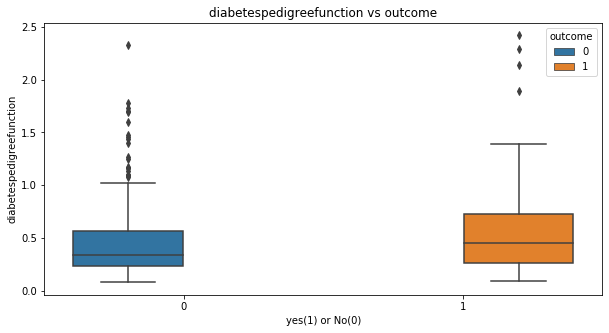

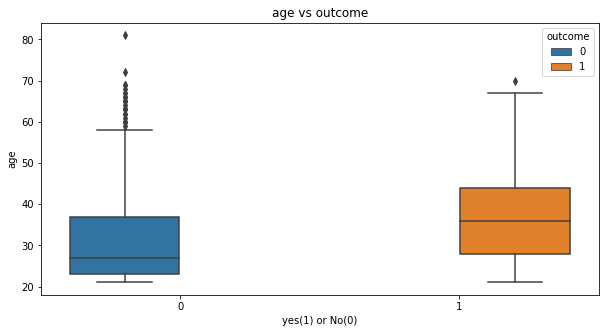

In [16]:
def boxplot(df,x):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data.outcome,y=data[x],hue=data.outcome)
    plt.title(x+' vs outcome')
    plt.xlabel('yes(1) or No(0)')
    plt.show()
    
for column in data.columns:
    if column!='outcome':
        boxplot(data,column)
        

### People with higher value of glucose, age, bmi are likely to have greater probability of having dibetese 

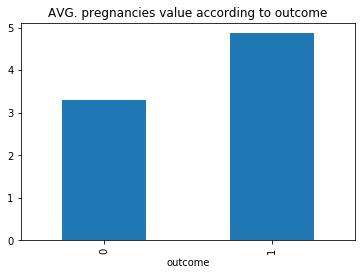

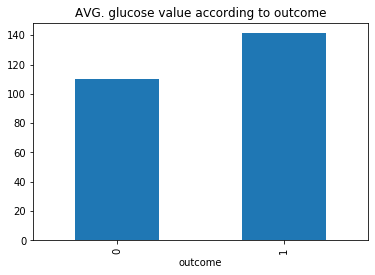

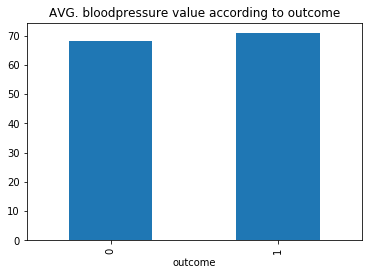

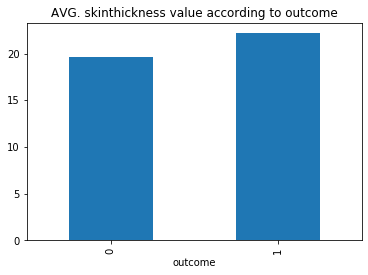

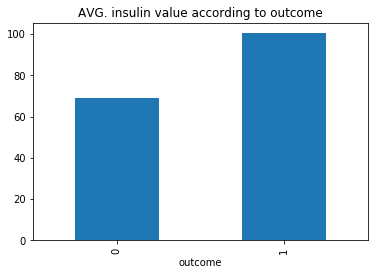

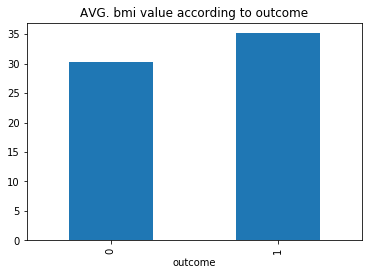

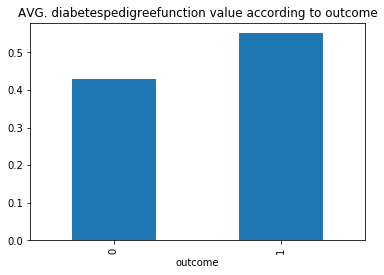

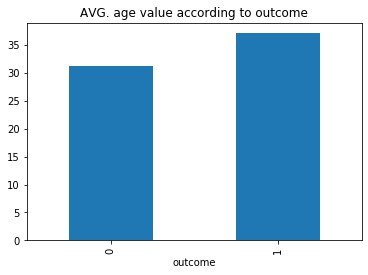

In [72]:
def mean_vs_outcome(df,x):
    plot = df.groupby(['outcome'])[x].mean()
    plot.plot(kind='bar')
    plt.title('AVG. '+x+' value according to outcome')
    plt.show()

for column in data.columns:
    if column!='outcome':
        mean_vs_outcome(data,column)


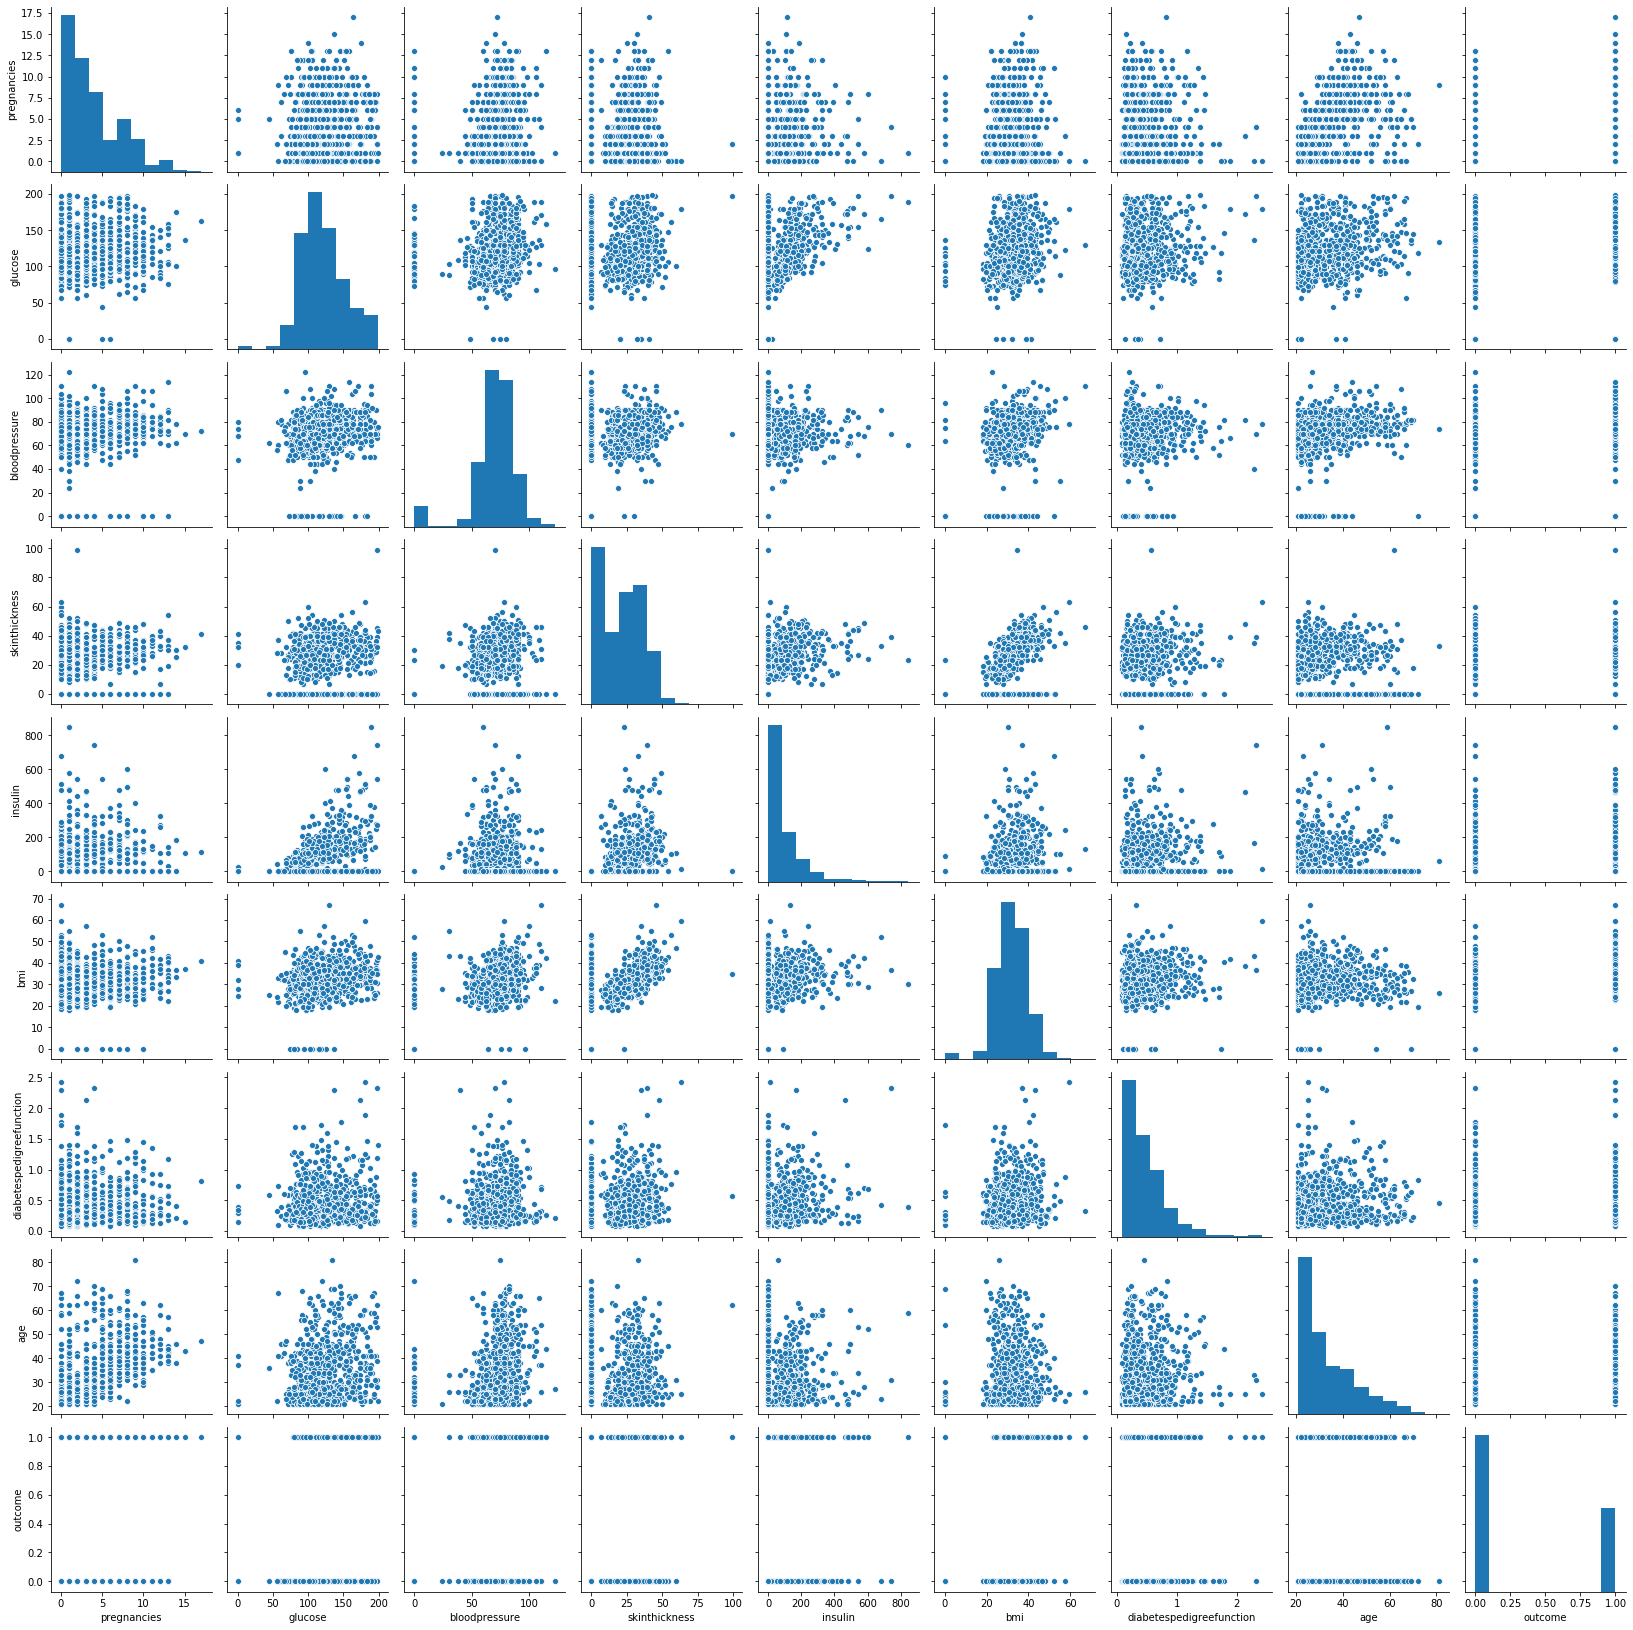

In [73]:
sns.pairplot(data)

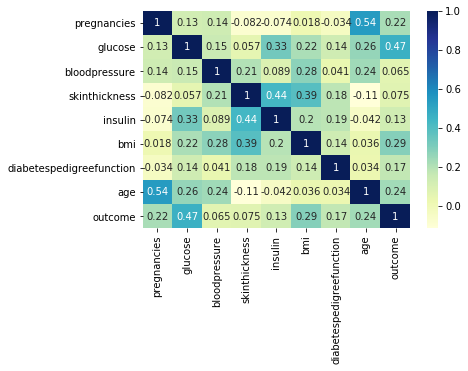

In [81]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

## Spliting the dataset into test and train set

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [161]:
X = data.drop('outcome',axis=1)
y = data['outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

logr = LogisticRegression()
logr.fit(X_train,y_train)
logr.score(X_test,y_test)

0.7402597402597403

In [162]:
y_pred = logr.predict(X_test)
print("Confusion matrix: \n",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix: 
 [[78 26]
 [14 36]]


### RidgeClassifier

In [163]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(RidgeClassifier(),param)
grid.fit(X_train,y_train)
print("Best Parameter : {}".format(grid.best_params_))

Best Parameter : {'alpha': 0.0001}


In [164]:
ridge = RidgeClassifier(alpha=0.0001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.7402597402597403

In [165]:
print("Confusion matrix: \n",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix: 
 [[79 25]
 [15 35]]


## Oversampling the imbalanced class

In [361]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_sample(X,y)
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

oversampled_data = pd.concat([X_resampled,y_resampled],axis=1)
oversampled_data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
995,4,183,0,0,0,28.4,0.212,36,1
996,4,134,72,0,0,23.8,0.277,60,1
997,6,194,78,0,0,23.5,0.129,59,1
998,9,119,80,35,0,29.0,0.263,29,1


In [362]:
X_s = oversampled_data.drop('outcome',axis=1)
y_s = oversampled_data.outcome

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print(lr_model.score(X_test,y_test))

0.7291666666666666


In [363]:
print("Recal: ",metrics.recall_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Recal:  0.711864406779661
Precision:  0.5454545454545454
[[98 35]
 [17 42]]


### Undersampling

In [364]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled,y_resampled = rus.fit_sample(X,y)
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

oversampled_data = pd.concat([X_resampled,y_resampled],axis=1)
oversampled_data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,4,110,76,20,100,28.4,0.118,27,0
1,6,114,0,0,0,0.0,0.189,26,0
2,4,91,70,32,88,33.1,0.446,22,0
3,2,90,70,17,0,27.3,0.085,22,0
4,9,89,62,0,0,22.5,0.142,33,0
...,...,...,...,...,...,...,...,...,...
531,1,128,88,39,110,36.5,1.057,37,1
532,0,123,72,0,0,36.3,0.258,52,1
533,6,190,92,0,0,35.5,0.278,66,1
534,9,170,74,31,0,44.0,0.403,43,1


In [365]:
X_s = oversampled_data.drop('outcome',axis=1)
y_s = oversampled_data.outcome

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35)
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print("Accuracy: ",lr_model.score(X_test,y_test))

Accuracy:  0.6802973977695167


In [366]:
print("Recal: ",metrics.recall_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Recal:  0.7972972972972973
Precision:  0.45384615384615384
[[124  71]
 [ 15  59]]


## Adding more features

In [367]:
X_copy = X
X_copy

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### Adding polynomial(power) of features

In [398]:
def polyfeatures(x,d):
    m = len(x)
    xpoly = np.zeros((m,d))
    for i in range(m):
        for j in range(d):
            xpoly[i][j] = x[i]**(j+1)
    return xpoly
d = 4
X_poly = polyfeatures(X_copy['glucose'],d)
X_poly = pd.DataFrame(X_poly)
Xpolynomial = pd.concat([X_copy,X_poly],axis=1)

X_poly = polyfeatures(X_copy['bmi'],d)
X_poly = pd.DataFrame(X_poly)
Xpolynomial = pd.concat([Xpolynomial,X_poly],axis=1)
'''''
X_poly = polyfeatures(X_copy['bloodpressure'],d)
X_poly = pd.DataFrame(X_poly)
Xpolynomial = pd.concat([Xpolynomial,X_poly],axis=1)

X_poly = polyfeatures(X_copy['insulin'],d)
X_poly = pd.DataFrame(X_poly)
Xpolynomial = pd.concat([Xpolynomial,X_poly],axis=1)
'''''
Xpolynomial.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,0,1,2,3,0,1,2,3
0,6,148,72,35,0,33.6,0.627,50,148.0,21904.0,3241792.0,4.797852e+08,33.6,1128.96,37933.056,1.274551e+06
1,1,85,66,29,0,26.6,0.351,31,85.0,7225.0,614125.0,5.220062e+07,26.6,707.56,18821.096,5.006412e+05
2,8,183,64,0,0,23.3,0.672,32,183.0,33489.0,6128487.0,1.121513e+09,23.3,542.89,12649.337,2.947296e+05
3,1,89,66,23,94,28.1,0.167,21,89.0,7921.0,704969.0,6.274224e+07,28.1,789.61,22188.041,6.234840e+05
4,0,137,40,35,168,43.1,2.288,33,137.0,18769.0,2571353.0,3.522754e+08,43.1,1857.61,80062.991,3.450715e+06


In [399]:
X_train_poly,X_test_poly,y_train_poly,y_test_poly = train_test_split(Xpolynomial,y)

scalar = MinMaxScaler()
X_train_poly = scalar.fit_transform(X_train_poly)
X_test_poly = scalar.fit_transform(X_test_poly)

logr = LogisticRegression()

logr.fit(X_train_poly,y_train_poly)
y_pred_poly = logr.predict(X_test_poly)

print("Training score: ",logr.score(X_train_poly,y_train_poly))
print("Testing score: ",logr.score(X_test_poly,y_test_poly))

Training score:  0.7517361111111112
Testing score:  0.7864583333333334


In [400]:
print("Recall: ",metrics.recall_score(y_test_poly,y_pred_poly))
print("Precision: ",metrics.precision_score(y_test_poly,y_pred_poly))
print("confusion matrix: \n",metrics.confusion_matrix(y_test_poly,y_pred_poly))

Recall:  0.6785714285714286
Precision:  0.6229508196721312
confusion matrix: 
 [[113  23]
 [ 18  38]]


### Ridge

In [401]:
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(RidgeClassifier(),param)
grid.fit(X_train_poly,y_train_poly)
print("Best Parameter : {}".format(grid.best_params_))



Best Parameter : {'alpha': 0.0001}


In [402]:
ridge = RidgeClassifier(alpha=0.0001)
ridge.fit(X_train_poly,y_train_poly)
y_pred = ridge.predict(X_test_poly)
print("Score: ",ridge.score(X_test_poly,y_test_poly))
print("Recall: ",metrics.recall_score(y_test_poly,y_pred_poly))
print("Precision: ",metrics.precision_score(y_test_poly,y_pred_poly))
print("confusion matrix: \n",metrics.confusion_matrix(y_test_poly,y_pred_poly))

Score:  0.6354166666666666
Recall:  0.6785714285714286
Precision:  0.6229508196721312
confusion matrix: 
 [[113  23]
 [ 18  38]]
